In [57]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [58]:
df_raw = pd.read_csv("D:\Abhishek\exam 2\Machine Learning Exam Paper 2\Datasets\MonthWiseMarketArrivals_Clean.csv")

In [59]:
df_raw.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [60]:
df_raw.shape

(10227, 10)

In [61]:
df_raw.drop(df_raw.loc[df_raw['city'] != "MUMBAI" ].index, inplace=True)

In [62]:
df_raw.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


In [63]:
df_raw.shape

(146, 10)

In [64]:
df_raw.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2009.589041,221721.308219,900.842466,1316.945205,1114.452055
std,3.522678,40792.800998,730.909209,1019.072444,883.113380
min,2004.000000,131590.000000,215.000000,335.000000,287.000000
25%,2007.000000,195125.000000,434.500000,647.750000,544.500000
50%,2010.000000,222220.000000,691.500000,982.500000,846.500000
75%,2013.000000,246050.000000,1098.750000,1623.250000,1391.500000
max,2016.000000,413681.000000,4005.000000,5517.000000,4714.000000


In [65]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 6654 to 6799
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    146 non-null    object
 1   month     146 non-null    object
 2   year      146 non-null    int64 
 3   quantity  146 non-null    int64 
 4   priceMin  146 non-null    int64 
 5   priceMax  146 non-null    int64 
 6   priceMod  146 non-null    int64 
 7   state     146 non-null    object
 8   city      146 non-null    object
 9   date      146 non-null    object
dtypes: int64(5), object(5)
memory usage: 12.5+ KB


In [66]:
pd.to_datetime(df_raw['date']).min(), pd.to_datetime(df_raw['date']).max()

(Timestamp('2004-01-01 00:00:00'), Timestamp('2016-02-01 00:00:00'))

In [67]:
cols = ["market","month","year", "quantity", "priceMin", "priceMax", "state", "city"]
df_raw.drop(cols, axis=1, inplace=True)

In [68]:
df_raw.head()

,priceMod,date
6654,849,January-2004
6655,387,January-2005
6656,402,January-2006
6657,997,January-2007
6658,448,January-2008


In [69]:
df_raw.shape

(146, 2)

In [70]:
df_raw = df_raw.groupby('date')['priceMod'].sum().reset_index()

In [71]:
df_raw['date'] = pd.to_datetime(df_raw['date'])
df_raw.set_index('date', inplace=True)
df_raw.index

DatetimeIndex(['2004-04-01', '2005-04-01', '2006-04-01', '2007-04-01',
               '2008-04-01', '2009-04-01', '2010-04-01', '2011-04-01',
               '2012-04-01', '2013-04-01',
               ...
               '2006-09-01', '2007-09-01', '2008-09-01', '2009-09-01',
               '2010-09-01', '2011-09-01', '2012-09-01', '2013-09-01',
               '2014-09-01', '2015-09-01'],
              dtype='datetime64[ns]', name='date', length=146, freq=None)

In [ ]:
df_raw.head()

,priceMod
date,
2004-04-01,397
2005-04-01,328
2006-04-01,290
2007-04-01,531
2008-04-01,418


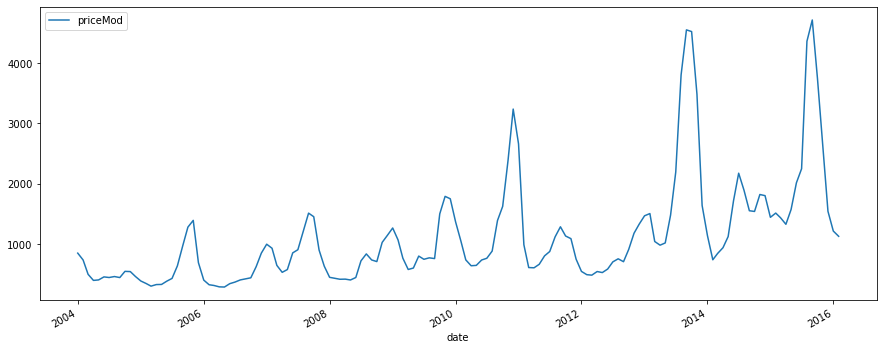

In [82]:
df_raw.plot(figsize=(15, 6))
plt.show()

In [83]:
y = df_raw['priceMod'].resample('MS').mean()
y

date
2004-01-01     849.0
2004-02-01     736.0
2004-03-01     498.0
2004-04-01     397.0
2004-05-01     405.0
               ...  
2015-10-01    3748.0
2015-11-01    2623.0
2015-12-01    1542.0
2016-01-01    1215.0
2016-02-01    1128.0
Freq: MS, Name: priceMod, Length: 146, dtype: float64

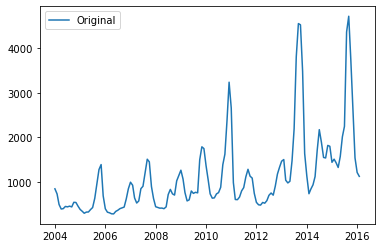

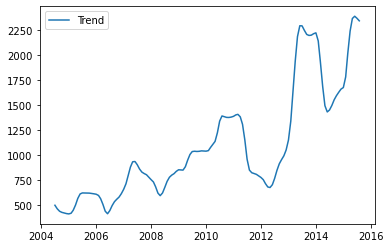

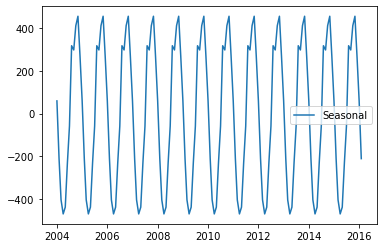

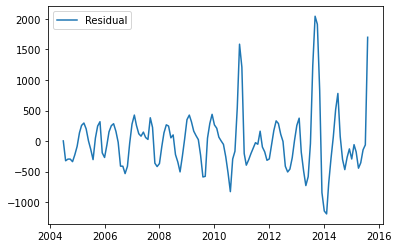

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.437736
p-value: 0.000254
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


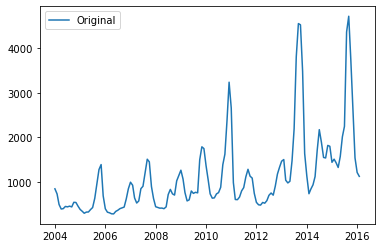

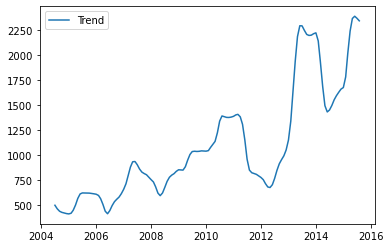

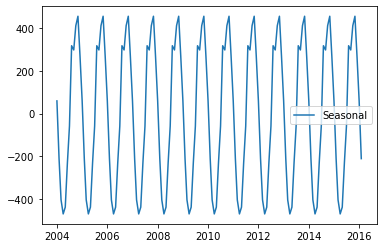

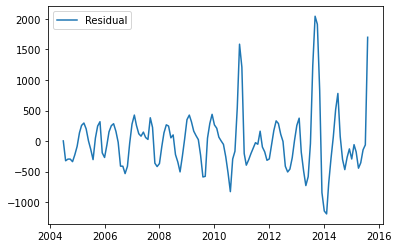

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [88]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2519.085107946781
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2283.5691633895676
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2212.472853624585
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1975.0193617478858
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2227.249976187957
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2136.7087142413448
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1967.4547709399012
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1953.1709526101345
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2327.344273572223
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2116.637164627975
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2071.5551186547887
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1842.8263198905277
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2097.111398316272
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2001.285637557216
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1852.1305513626485
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1822.3828044507702
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2159.385208595888
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1992.6076712375827


In [90]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0355      0.123      0.288      0.773      -0.206       0.277
ma.L1          0.5389      0.113      4.749      0.000       0.316       0.761
ar.S.L12      -0.6019      0.073     -8.267      0.000      -0.745      -0.459
ma.S.L12      -0.4419      0.125     -3.535      0.000      -0.687      -0.197
sigma2      1.337e+05   1.21e+04     11.066      0.000     1.1e+05    1.57e+05


C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


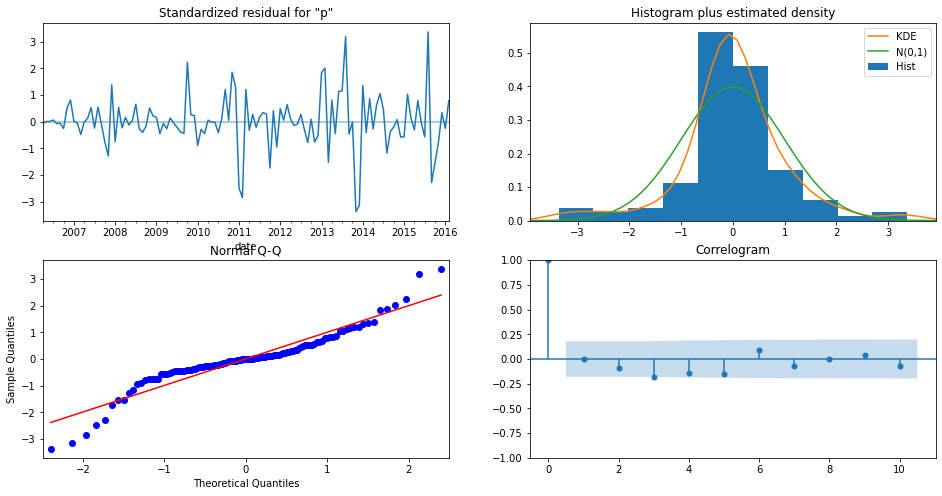

In [91]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


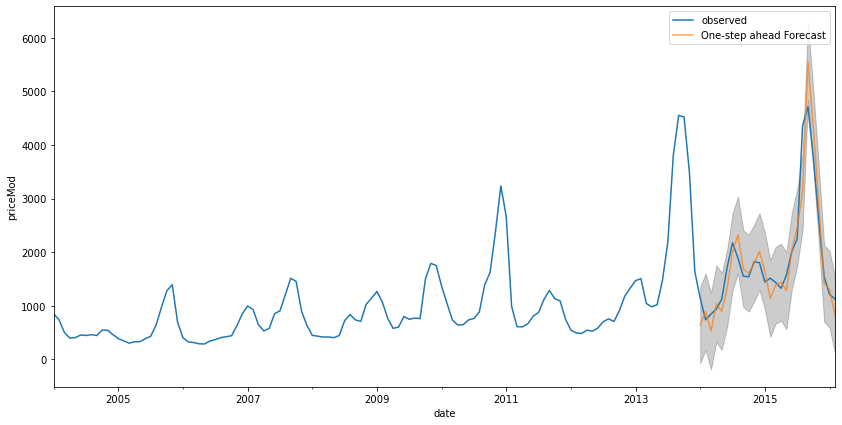

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2004':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('priceMod')
plt.legend()
plt.show()

In [96]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 150110.75
The Root Mean Squared Error of our forecasts is 387.44


            lower priceMod  upper priceMod
2016-03-01      490.320839     1923.774203
2016-04-01      -77.168074     2596.449410
2016-05-01     -391.078011     3126.682330
2016-06-01     -267.975103     3927.951847
2016-07-01      -99.812054     4679.009693
2016-08-01     -180.502847     5117.466350
2016-09-01     -423.036107     5347.563355
2016-10-01     -585.533268     5621.813886
2016-11-01     -795.169133     5820.153931
2016-12-01    -1407.445629     5592.114341
2017-01-01    -1924.251506     5439.523364
2017-02-01    -2195.666614     5515.138847
2017-03-01    -2440.862332     5584.400315


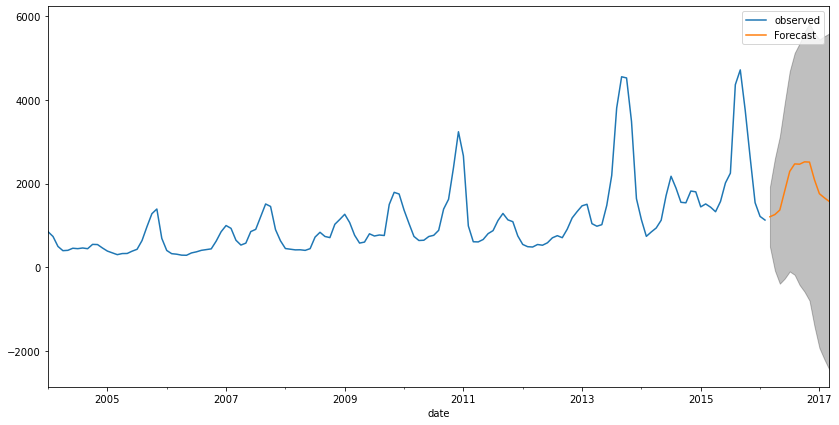

In [98]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

print(pred_ci)
plt.legend()
plt.show()